# K-Means
- This notebook contains the code to implement the K-means algorithm from scratch using `Lloyd's Algorithm`
- K-Means is an `Unsupervised Learning` algorithm
- K-means is a `Clustering` algorithm
- This implementation will initialize the centroids randomly
- Also, we will evaluate the model using `Elbow Method`

## Importing Libraries

In [61]:
# data manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt

# dataset
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# pre=processing
from sklearn.preprocessing import StandardScaler

## Custom Class

In [62]:
class KMeans:

  def __init__(self,
               n_clusters=5,
               n_iter=100,
               tol=1e-4,
               random_state=None):
    """
    Parameters:
    -----------

    n_clusters: int
                Number of clusters to find in the dataset

    n_iter: int
            Max. no. of iterations to run the algorithm

    tol: float
         To check for convergence of the algorithm

    random_state: int
                  To control randomness and reproducibility of results across multiple runs
    """
    self.n_clusters = n_clusters
    self.n_iter = n_iter
    self.tol = tol
    self.random_state = random_state


  def _euclidean_distance(self, a, b):
    return np.sqrt(np.sum((a - b) ** 2))


  def _initalize_centroids(self, X):
    # random initialization
    indices = np.random.choice(X.shape[0],
                               size=self.n_clusters,
                               replace=False)
    return X[indices, :]


  def _display_training(self):
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, len(self.inertias_) + 1),
             self.inertias_,
             linewidth=2)
    plt.xlabel("No. of Iterations")
    plt.ylabel("Inertia")
    plt.title("Lloyd's Algorithm")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


  def fit(self, X, y=None):
    """
    This method will train a K-Means model
    """

    if self.random_state:
      np.random.seed(self.random_state)

    n = X.shape[0]
    self.inertias_ = []
    self.n_features_in_ = X.shape[1]
    self.centroids_ = self._initalize_centroids(X)
    self.labels_ = None
    self.inertia_ = np.inf

    for i in range(self.n_iter):
      inertia = 0
      # assigning clusters
      labels = np.empty(n, dtype=int)
      for j, x in enumerate(X):
        distances = [self._euclidean_distance(x, centroid)
                     for centroid in self.centroids_]
        index = np.argmin(distances)
        labels[j] = index
        distance = distances[index]
        inertia += distance
      inertia /= n

      # checking convergence
      if np.abs(self.inertia_ - inertia) <= self.tol:
        print(f"> The algorithm converged in {i + 1} iterations")
        self.labels_ = labels
        break
      self.labels_ = labels
      self.inertia_ = inertia
      self.inertias_.append(inertia)

      # updating centroids
      for label in np.unique(self.labels_):
        subset = X[self.labels_ == label]
        self.centroids_[label] = np.mean(subset, axis=0)

    if i == self.n_iter - 1:
      print(f"> The algorithm ran all {self.n_iter} iterations")
    print("> Successfully trained the K-Means model\n")

    return self


  def transform(self, X):
    result = np.array([
        [self._euclidean_distance(x, centroid) for centroid in self.centroids_]
        for x in X
    ])
    return result



  def predict(self, X):
    return np.argmin(self.transform(X), axis=1)

## Getting the Data

In [63]:
X, y = make_blobs(n_samples=5000,
                  n_features=50,
                  centers=6,
                  cluster_std=1.0,

                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=42)

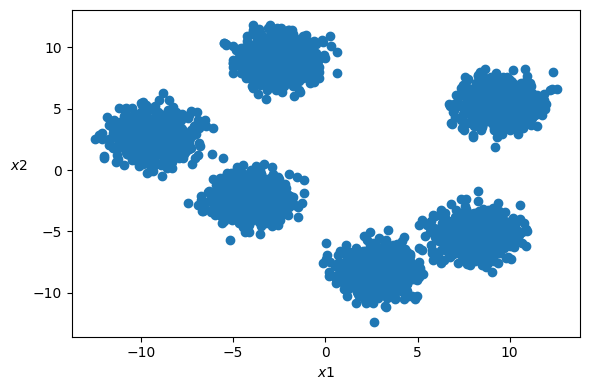

In [64]:
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("$x1$")
plt.ylabel("$x2$", rotation=0, labelpad=10)
plt.tight_layout()
plt.show()

## Scaling the Data

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Training the Model

In [66]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)

> The algorithm converged in 4 iterations
> Successfully trained the K-Means model



In [67]:
kmeans.centroids_

array([[ 3.06898433e-01, -1.39065147e+00, -1.09501598e+00,
         1.28132679e+00,  1.12932599e-01, -1.13731547e+00,
        -8.24009283e-01,  3.05539734e-02, -1.17038814e+00,
        -6.83926680e-01,  8.91398166e-01,  2.18544487e-01,
        -7.05876996e-02, -1.03030152e+00,  8.41639062e-01,
        -1.18663218e+00, -4.40206520e-01,  8.55226288e-01,
         7.95662307e-01,  9.78847833e-01, -7.33095111e-01,
         3.75246694e-01, -8.82107716e-01, -3.32285472e-01,
        -1.10452931e+00, -9.99506698e-01,  1.07314445e+00,
        -3.47676706e-01,  9.57645317e-01,  8.76392809e-01,
         6.54321550e-01,  9.20643487e-01,  6.00750536e-01,
         5.97701248e-02, -1.08424439e+00,  8.77641473e-01,
        -1.14601612e+00, -1.49366834e+00,  3.74314461e-01,
        -1.15594651e+00,  1.37051557e+00,  1.17933760e+00,
         8.23166555e-01, -7.06330171e-01, -1.17224690e+00,
         1.54695273e+00, -7.79734126e-01,  1.41211187e+00,
         1.20711474e+00,  1.47759665e+00],
       [ 1.27

In [68]:
kmeans.inertia_

np.float64(3.9210308008073764)

In [69]:
kmeans.inertias_

[np.float64(5.957822047674311),
 np.float64(4.085928493034919),
 np.float64(3.9210308008073764)]

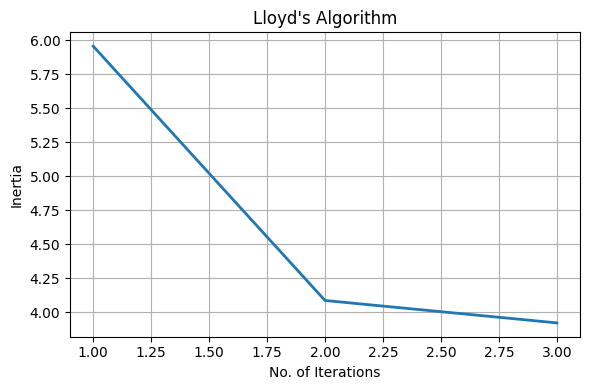

In [70]:
kmeans._display_training()

In [71]:
kmeans.transform(X_scaled)

array([[ 9.22626099, 10.27148671, 10.03650471,  5.20638095],
       [10.51494477,  1.37325804, 10.31849736,  9.42390294],
       [11.06835852, 10.78764843, 10.50478705,  5.64506838],
       ...,
       [ 1.63837588, 10.6343013 , 10.04750478,  8.85083428],
       [10.99700716, 10.79571969, 10.58029926,  5.4595848 ],
       [ 1.25821458, 10.48117426, 10.07784556,  8.69897706]])

## Evaluating the Model

### Elbow Method

In [72]:
inertias = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k,
                  random_state=7)
  kmeans.fit(X_scaled)
  inertias.append(kmeans.inertia_)

inertias

> The algorithm converged in 3 iterations
> Successfully trained the K-Means model

> The algorithm converged in 3 iterations
> Successfully trained the K-Means model

> The algorithm converged in 4 iterations
> Successfully trained the K-Means model

> The algorithm converged in 4 iterations
> Successfully trained the K-Means model

> The algorithm converged in 5 iterations
> Successfully trained the K-Means model

> The algorithm converged in 4 iterations
> Successfully trained the K-Means model

> The algorithm converged in 6 iterations
> Successfully trained the K-Means model

> The algorithm converged in 6 iterations
> Successfully trained the K-Means model

> The algorithm converged in 6 iterations
> Successfully trained the K-Means model

> The algorithm converged in 7 iterations
> Successfully trained the K-Means model



[np.float64(7.063945914795851),
 np.float64(5.988097182426431),
 np.float64(5.261245921177299),
 np.float64(3.9564809804489545),
 np.float64(2.616265860079041),
 np.float64(2.60592452992826),
 np.float64(2.5947552922535984),
 np.float64(2.5846942565926385),
 np.float64(1.4073425873095966),
 np.float64(1.3969976332978908)]

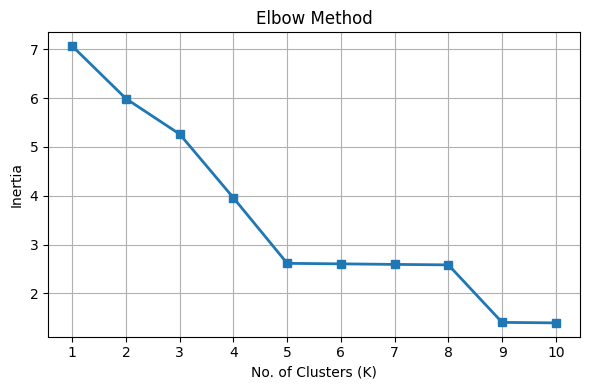

In [73]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(inertias) + 1),
         inertias,
         marker="s",
         linewidth=2)
plt.xticks(range(1, len(inertias) + 1))
plt.xlabel("No. of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.tight_layout()
plt.show()

- From the diagram, we can observe that the plot `elbow's` when K = 5
- Usually, the `elbow` point is chosen as the optimal K
- As K increases, inertia will always decrease